In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [231]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [144]:
# set configuration
sample_size = 100
nr_sample_sets = 20
num_steps = 10
max_t = 20
t = np.linspace(0.001, max_t, num_steps)
sample_config = [sample_size, nr_sample]

# classificatiom
n_folds = 5
test_size = 0.2

## Figures for report

In [73]:
max_t = np.pi*2
num_steps= 20
t = np.linspace(0.001, max_t, num_steps)

In [74]:
from scipy.stats import uniform
r = uniform.rvs(size=100)
ecf = np.mean(np.exp(1j * np.outer(r, t).astype(float)), axis=0)
ecf_r = np.real(ecf)
ecf_i = np.imag(ecf)

Text(0, 0.5, 'imaginary part')

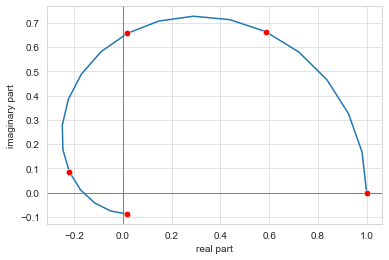

In [77]:
fig, ax = plt.subplots()
sns.set_style("whitegrid",{'grid.color':'#DDDDDD'})

ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.plot(ecf_r.T, ecf_i.T)
sns.scatterplot(x=[ecf_r.T[0]], y=[ecf_i.T[0]], color='red', s=40, zorder=10)
sns.scatterplot(x=[ecf_r.T[5]], y=[ecf_i.T[5]], color='red', s=40, zorder=10)
sns.scatterplot(x=[ecf_r.T[9]], y=[ecf_i.T[9]], color='red', s=40, zorder=10)
sns.scatterplot(x=[ecf_r.T[15]], y=[ecf_i.T[15]], color='red', s=40, zorder=10)
sns.scatterplot(x=[ecf_r.T[-1]], y=[ecf_i.T[-1]], color='red', s=40, zorder=10)
ax.set_xlabel('real part')
ax.set_ylabel('imaginary part')

(-0.3, 1.1)

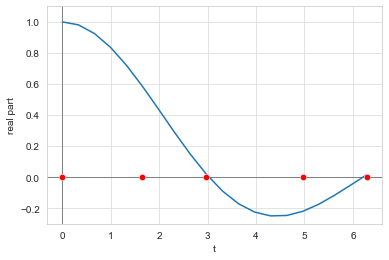

In [97]:
fig, ax = plt.subplots()
sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
sns.scatterplot(x=[t[0]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[5]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[9]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[15]], y=0, color='red', s=40, zorder=10)
sns.scatterplot(x=[t[-1]], y=0, color='red', s=40, zorder=10)
ax.plot(t, ecf_r)
ax.set_xlabel('t')
ax.set_ylabel('real part')
ax.set_ylim(-0.3,1.1)

### Bounded distributions

In [145]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [146]:
ecf_df = dem.get_ecf(bounded_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,1.0,0.665262,0.170235,0.038244,0.049745,0.056456,0.137748,0.147752,0.058854,0.043789,...,0.554453,0.530604,0.292958,0.199883,0.127294,0.108901,0.201213,0.218751,0.178462,beta_1_2
1,1.0,0.667105,0.147008,0.041247,0.168057,0.128650,-0.009537,-0.072399,-0.112084,-0.131783,...,0.562540,0.536365,0.241734,0.201232,0.314480,0.304341,0.226741,0.165312,0.059792,beta_1_2
2,1.0,0.698349,0.209232,-0.001834,-0.056401,-0.118574,-0.159251,-0.143231,-0.036486,0.083416,...,0.559122,0.615079,0.427569,0.321872,0.247908,0.145592,0.025786,-0.054824,-0.000080,beta_1_2


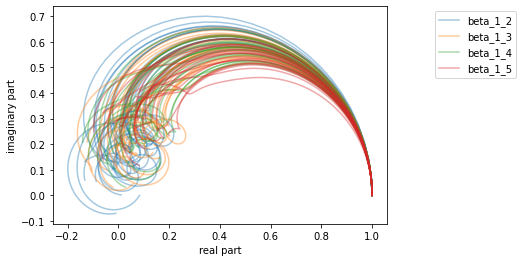

In [6]:
dem.get_ecf_plot(ecf_df,t)

In [105]:
def plot_cv_ecf(clf_result):
    sample_size_list = clf_result['sample_size'].unique()
    clf_result['nr_features'] = clf_result['nr_steps'] + 1
    
    for i in (clf_result['max_t'].unique()):
        fig, ax = plt.subplots()
        sns.set_style('whitegrid',{'grid.color':'#DDDDDD'})
        for j in range(len(sample_size_list)):
            data = clf_result.loc[(clf_result['max_t']==i) & (clf_result['sample_size']==sample_size_list[j])]
            plt.plot(data['nr_features'], data['mean'], label=sample_size_list[j])
            plt.fill_between(data['nr_features'], data['mean']-data['se'], data['mean']+data['se'], alpha=0.2)
        ax.legend(loc='lower left', ncol=3, title='Input size')
        ax.xaxis.set_major_locator(plt.MultipleLocator(2))
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
        plt.title('for t in [0.001,%i]' %i)
        plt.ylabel('Accuracy')
        plt.xlabel('Number of constructed features')
        #plt.grid(color='#DDDDDD')
        plt.ylim(0,1.1)
        plt.show()

### SVM

In [64]:
cost = [0.01, 0.1, 0.5, 1, 5, 10]
gamma = [0.01, 0.1, 1, 5, 10]

In [203]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = np.arange(1,20)
max_t_list = [0.01*np.pi, 0.1*np.pi,np.pi, np.pi*2]

In [204]:
res = cm.cv_ecf_svm(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

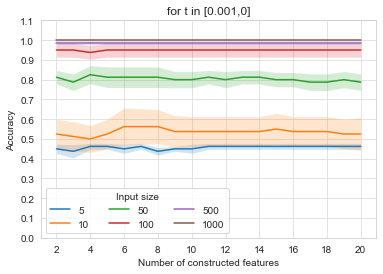

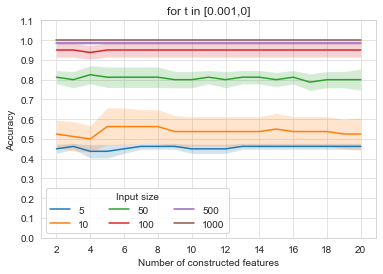

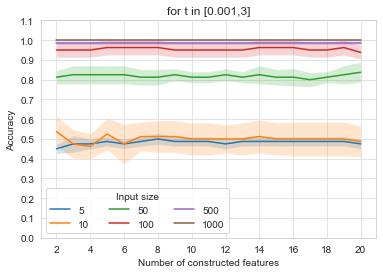

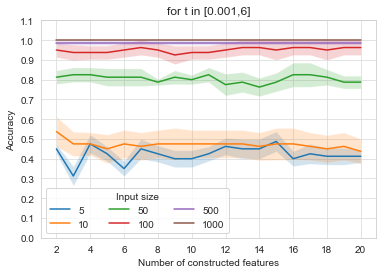

In [205]:
cm.plot_cv_ecf(res)

### Logistic Regression

In [208]:
C = [0.01, 0.25, 1, 5, 10]

In [212]:
res_lr = cm.cv_ecf_lr(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

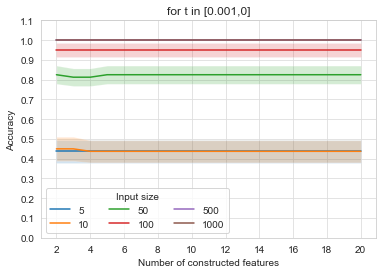

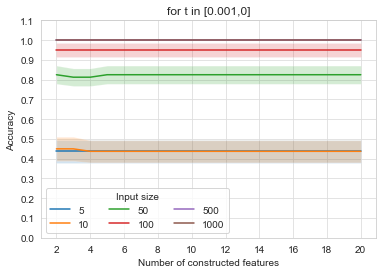

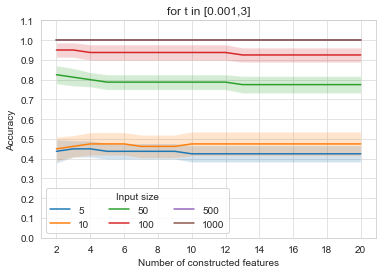

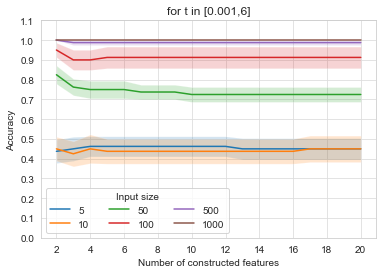

In [213]:
cm.plot_cv_ecf(res_lr)

## Varying number of elements

In [206]:
res_flex_svm = cm.cv_ecf_svm(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, cost, gamma, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

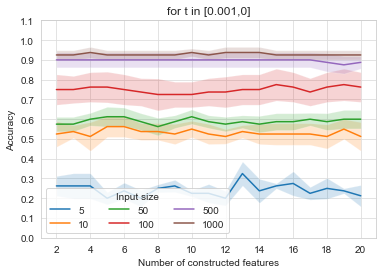

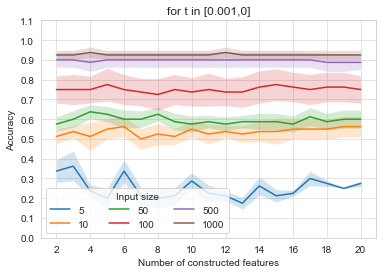

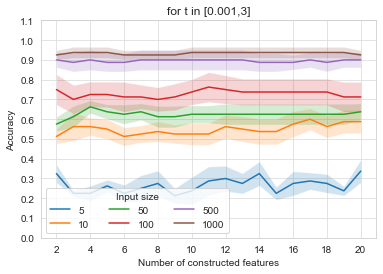

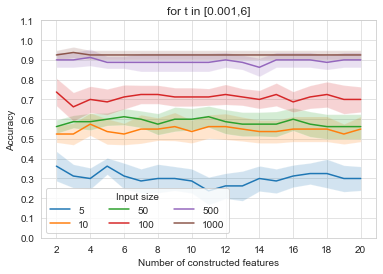

In [207]:
cm.plot_cv_ecf(res_flex_svm)

In [214]:
res_flex_lr = cm.cv_ecf_lr(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, n_folds, test_size, C, flex=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

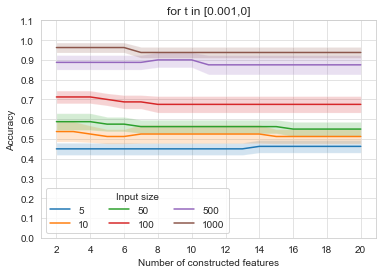

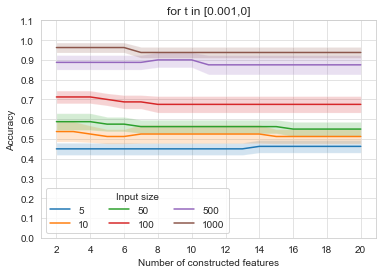

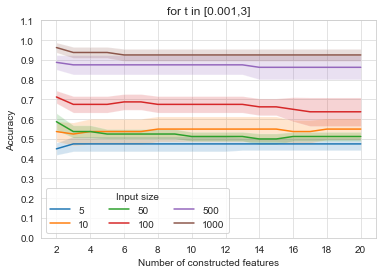

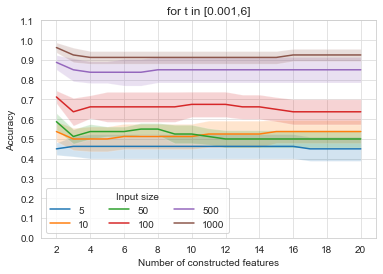

In [215]:
cm.plot_cv_ecf(res_flex_lr)

### Heavytail distributions

In [80]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = False)

In [81]:
ecf_df = dem.get_ecf(heavytail_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,0.999975,0.734550,0.540754,0.419810,0.277320,0.202564,0.113729,0.102765,-0.011702,-0.083166,...,0.146400,0.169628,0.114158,0.084561,0.102338,0.157605,0.157912,0.181307,0.105699,cauchy
1,0.999994,0.794732,0.573212,0.356730,0.300303,0.210003,0.137510,0.107348,0.050856,0.051647,...,0.117869,0.090790,0.009087,0.120867,0.162808,0.182155,0.146635,0.207622,0.273731,cauchy
2,0.999972,0.677589,0.451077,0.395092,0.352410,0.246896,0.224693,0.126634,0.010717,0.035557,...,0.192997,0.147016,0.288746,0.186762,0.149579,0.157058,0.112728,0.029065,0.105092,cauchy


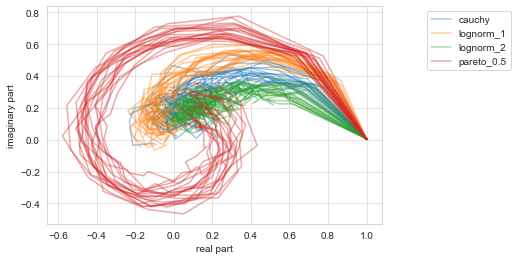

In [82]:
dem.get_ecf_plot(ecf_df, t)

### SVM

In [84]:
res_svm_ht = cm.cv_ecf_svm(sample_size_list, max_t_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, cost, gamma, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

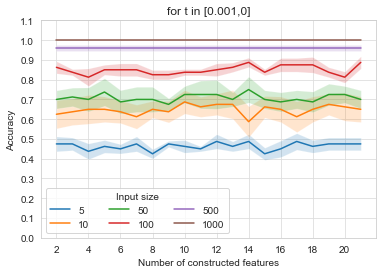

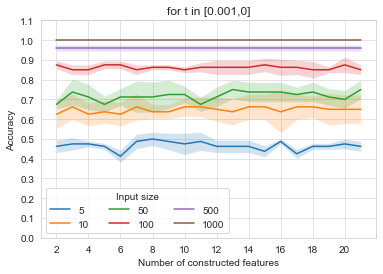

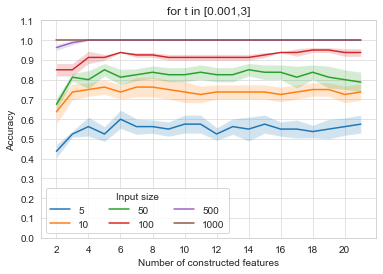

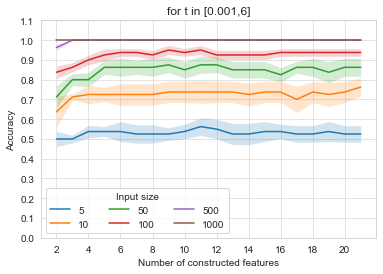

In [108]:
plot_cv_ecf(res_svm_ht)

### Logistic Regression

In [218]:
res_lr_ht = cm.cv_ecf_lr(sample_size_list, max_t_list, num_steps_list, heavytail_dists, nr_sample_sets, n_folds, test_size, C, transform = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


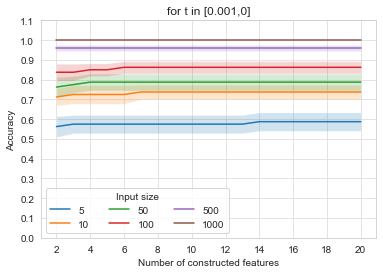

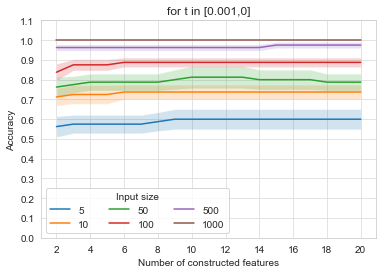

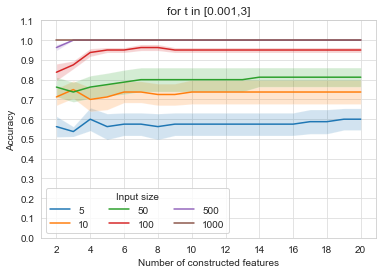

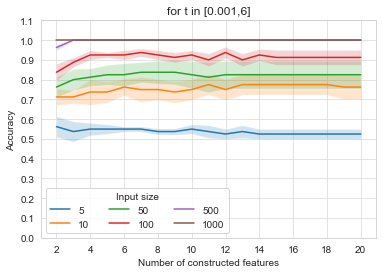

In [224]:
cm.plot_cv_ecf(res_lr_ht)

## Multi modal

In [220]:
nr_modes = 5
nr_sample_sets = 20
nr_mm_dist = 10
sample_size=50

In [221]:
mm_df= dm.get_multimodal_dists(nr_mm_dist, nr_sample_sets, nr_modes, sample_size)
moments_df = dem.get_moments(mm_df, 10)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,6.266951,4.711539,0.559588,51.315955,11.872986,729.347504,176.429355,11671.184056,1049.000154,1.995957e+05,Dist 01
1,6.364192,5.533297,-3.474912,75.969912,-154.536428,1606.595455,-6035.241597,45802.908799,-229982.954940,1.529059e+06,Dist 01
2,6.338440,4.781923,-0.569000,48.169880,0.531132,613.064214,239.339232,8643.396388,6907.899950,1.288245e+05,Dist 01


### svm

In [ ]:
res_mm_svm = cm.cv_ecf_svm_mm(sample_size_list, max_t_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, cost, gamma)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [227]:
cm.plot_cv_ecf(res_mm_svm)

KeyError: 'max_t'

In [226]:
res_mm_lr = cm.cv_ecf_lr_mm(sample_size_list,max_t_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, n_folds, test_size, C)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [228]:
cm.plot_cv_ecf(res_mm_lr)

KeyError: 'max_t'